In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix,  roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('cancer_reg_updated.csv')

data.fillna(data.mean(), inplace=True)

# Encode the categorical variable 'State'
le = LabelEncoder()
data['avgDeathsPerYear'] = le.fit_transform(data['avgDeathsPerYear'])

# Split the data into training and testing sets
X = data.drop('avgDeathsPerYear', axis=1)
y = data['avgDeathsPerYear']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Convert regression predictions to classification
y_pred_class = np.where(y_pred >= 0.5, 1, 0)
y_test_class = np.where(y_test >= 0.5, 1, 0)

# Calculate accuracy and F1 score
acc = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)
print('Accuracy:', acc)
print('F1 Score:', f1)

# Create confusion matrix
#cm = confusion_matrix(y_test_class, y_pred_class)
#print('Confusion Matrix:')
#print(cm)



#roc curve

Mean Squared Error: 754.3672131147541
R-squared: 0.9605471870960796
Accuracy: 0.994535519125683
F1 Score: 0.9972602739726028


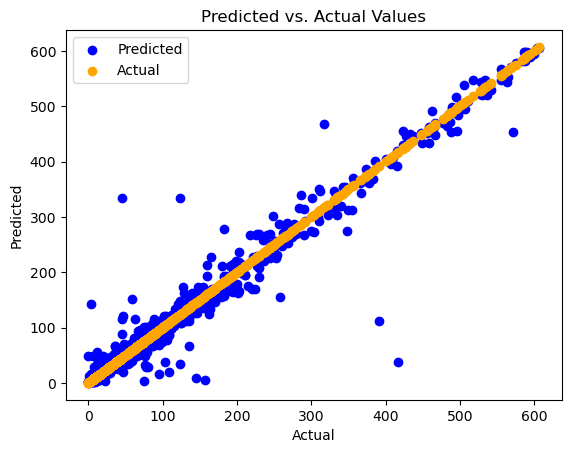

In [5]:
# Scatterplot for the predicted vs. actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()